In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Input,Dropout,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB4, Xception, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import random
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
labels = pd.read_csv('/content/drive/MyDrive/DogBreed/labels.csv')
labels

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [3]:
sample_submission_csv=pd.read_csv("/content/drive/MyDrive/DogBreed/sample_submission.csv")
sample_submission_csv

id  affenpinscher  afghan_hound  \
0      000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1      00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2      0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3      001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4      001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   
...                                 ...            ...           ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8       0.008333      0.008333   
10353  fff1ec9e6e413275984966f745a313b0       0.008333      0.008333   
10354  fff74b59b758bbbf13a5793182a9bbe4       0.008333      0.008333   
10355  fff7d50d848e8014ac1e9172dc6762a3       0.008333      0.008333   
10356  fffbff22c1f51e3dc80c4bf04089545b       0.008333      0.008333   

       african_hunting_dog  airedale  american_staffordshire_terrier  \
0                 0.008333  0.008333                        0.008333   
1                 0.008333  0.008333                        0.008333   
2                 0.008333  0.008333                        0.008333   
3                 0.008333  0.008333                        0.008333   
4                 0.008333  0.008333                        0.008333   
...                    ...       ...                             ...   
10352             0.008333  0.008333                        0.008333   
10353             0.008333  0.008333                        0.008333   
10354             0.008333  0.008333                        0.008333   
10355             0.008333  0.008333                        0.008333   
10356             0.008333  0.008333                        0.008333   

       appenzeller  australian_terrier   basenji    basset  ...  toy_poodle  \
0         0.008333            0.008333  0.008333  0.008333  ...    0.008333   
1         0.008333            0.008333  0.008333  0.008333  ...    0.008333   
2         0.008333            0.008333  0.008333  0.008333  ...    0.008333   
3         0.008333            0.008333  0.008333  0.008333  ...    0.008333   
4         0.008333            0.008333  0.008333  0.008333  ...    0.008333   
...            ...                 ...       ...       ...  ...         ...   
10352     0.008333            0.008333  0.008333  0.008333  ...    0.008333   
10353     0.008333            0.008333  0.008333  0.008333  ...    0.008333   
10354     0.008333            0.008333  0.008333  0.008333  ...    0.008333   
10355     0.008333            0.008333  0.008333  0.008333  ...    0.008333   
10356     0.008333            0.008333  0.008333  0.008333  ...    0.008333   

       toy_terrier    vizsla  walker_hound  weimaraner  \
0         0.008333  0.008333      0.008333    0.008333   
1         0.008333  0.008333      0.008333    0.008333   
2         0.008333  0.008333      0.008333    0.008333   
3         0.008333  0.008333      0.008333    0.008333   
4         0.008333  0.008333      0.008333    0.008333   
...            ...       ...           ...         ...   
10352     0.008333  0.008333      0.008333    0.008333   
10353     0.008333  0.008333      0.008333    0.008333   
10354     0.008333  0.008333      0.008333    0.008333   
10355     0.008333  0.008333      0.008333    0.008333   
10356     0.008333  0.008333      0.008333    0.008333   

       welsh_springer_spaniel  west_highland_white_terrier   whippet  \
0                    0.008333                     0.008333  0.008333   
1                    0.008333                     0.008333  0.008333   
2                    0.008333                     0.008333  0.008333   
3                    0.008333                     0.008333  0.008333   
4                    0.008333                     0.008333  0.008333   
...                       ...                          ...       ...   
10352                0.008333                     0.008333  0.008333   
10353                0.008333                     0.008333  0.008333   
10354        

In [4]:
labelnames=pd.read_csv("/content/drive/MyDrive/DogBreed/sample_submission.csv").keys()[1:]
labelnames

Index(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller', 'australian_terrier',
       'basenji', 'basset', 'beagle',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=120)

In [5]:
labels["breed"].nunique()

120

In [6]:
labels["breed"].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [7]:
labels.isna().sum()

id       0
breed    0
dtype: int64

In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [9]:
breed_counts = labels['breed'].value_counts()
included_breeds = breed_counts[breed_counts > 100].index.tolist()
labels = labels[labels['breed'].isin(included_breeds)].reset_index(drop=True)

In [10]:
labels.shape

(2184, 2)

In [11]:
labels.head()

id               breed
0  003df8b8a8b05244b1d920bb6cf451f9             basenji
1  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
2  00693b8bc2470375cc744a6391d397ec         maltese_dog
3  00bee065dcec471f26394855c5c2f3de               cairn
4  013f8fdf6d638c7bb042f5f17e8a9fdc     tibetan_terrier

In [12]:
labels_map = {}
inv_labels_map = {}
count = 0
for label in labels['breed']:
  if(label in labels_map):
    continue

  labels_map[label] = count
  inv_labels_map[count] = label

  count = count + 1

print("Label Map: ", labels_map)
print("No. of Labels are: ", count)

Label Map:  {'basenji': 0, 'scottish_deerhound': 1, 'maltese_dog': 2, 'cairn': 3, 'tibetan_terrier': 4, 'shih-tzu': 5, 'australian_terrier': 6, 'samoyed': 7, 'entlebucher': 8, 'airedale': 9, 'leonberg': 10, 'bernese_mountain_dog': 11, 'afghan_hound': 12, 'miniature_pinscher': 13, 'irish_wolfhound': 14, 'great_pyrenees': 15, 'beagle': 16, 'japanese_spaniel': 17, 'pomeranian': 18, 'blenheim_spaniel': 19}
No. of Labels are:  20


{'basenji': 109, 'scottish_deerhound': 125, 'maltese_dog': 116, 'cairn': 105, 'tibetan_terrier': 106, 'shih-tzu': 111, 'australian_terrier': 101, 'samoyed': 108, 'entlebucher': 114, 'airedale': 106, 'leonberg': 105, 'bernese_mountain_dog': 113, 'afghan_hound': 115, 'miniature_pinscher': 101, 'irish_wolfhound': 100, 'great_pyrenees': 110, 'beagle': 104, 'japanese_spaniel': 104, 'pomeranian': 110, 'blenheim_spaniel': 101}


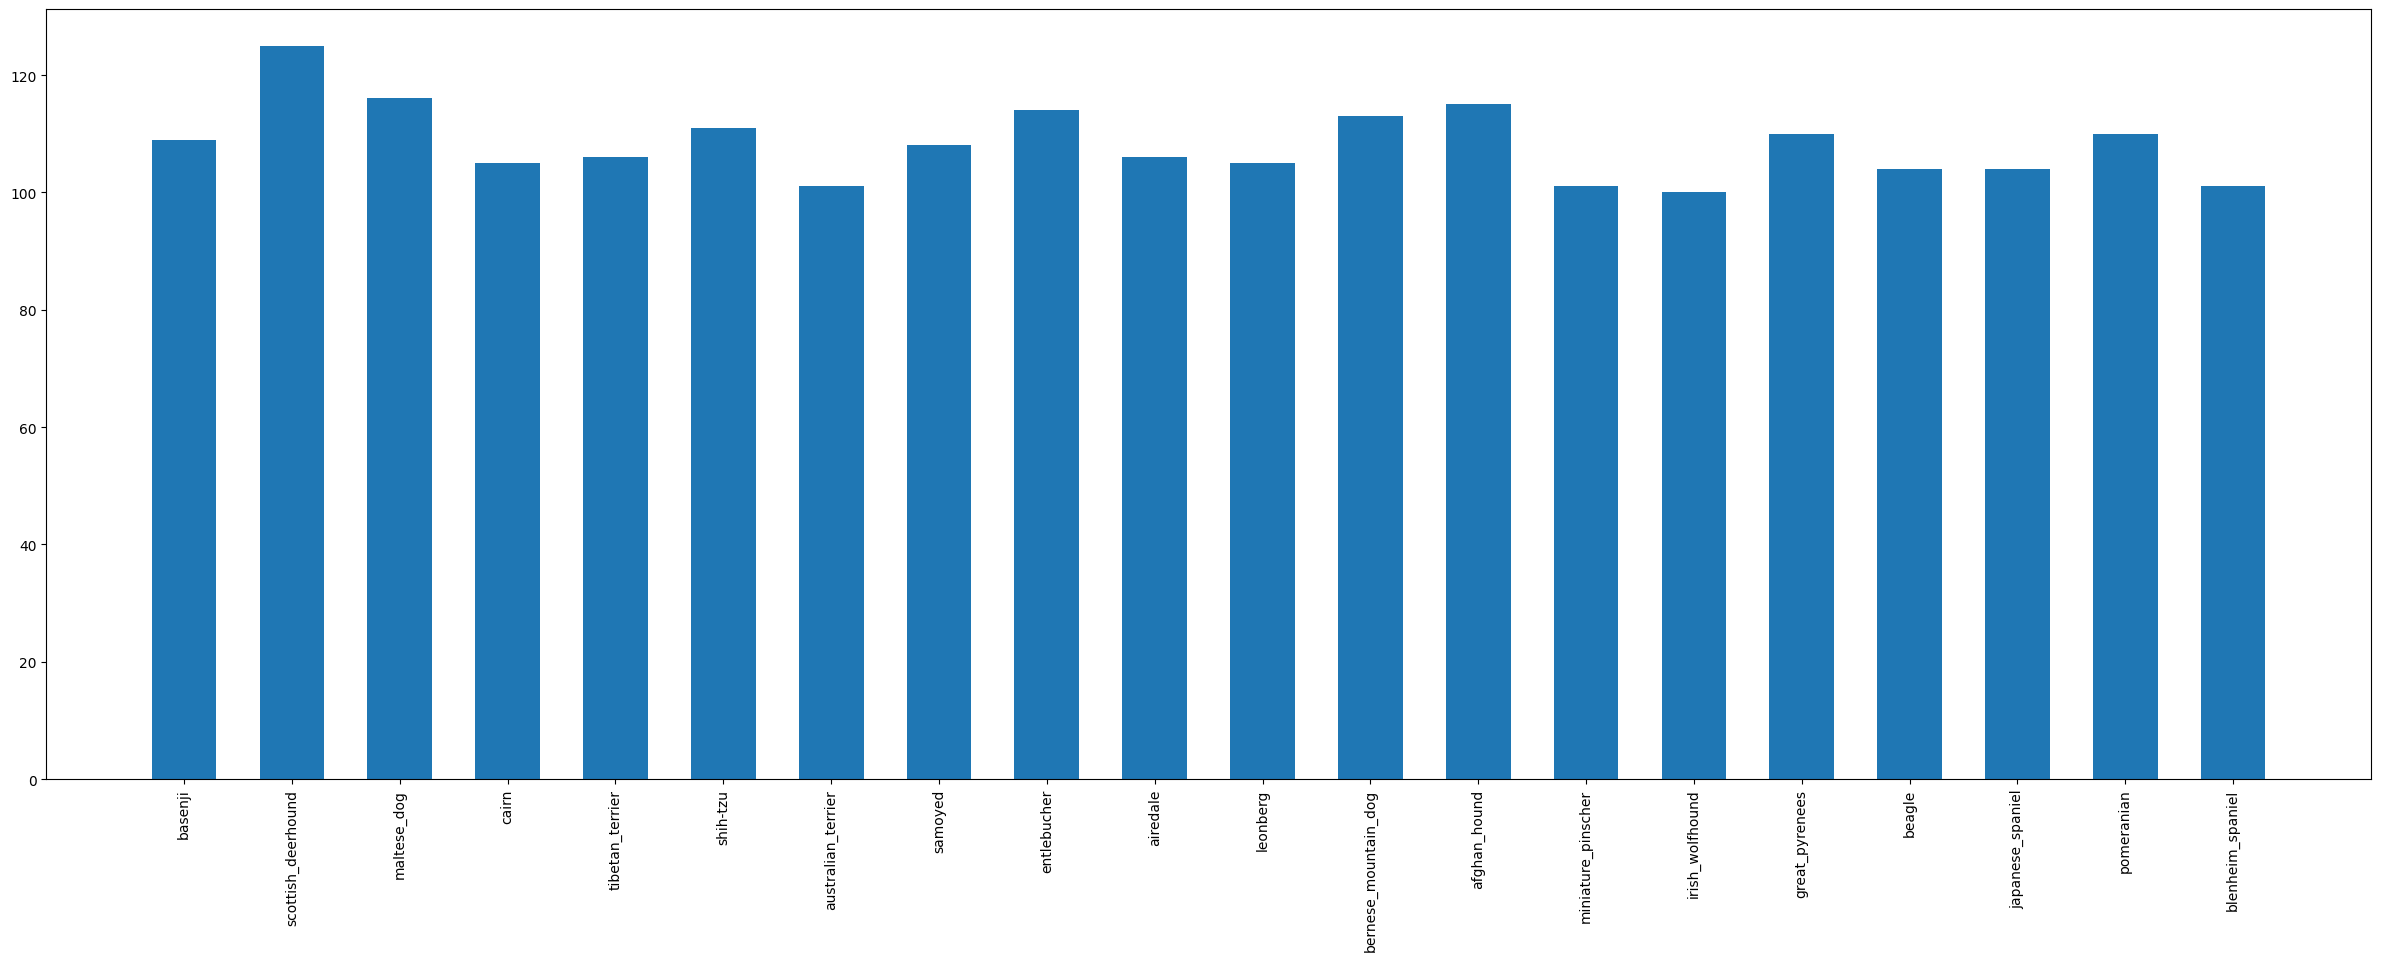

In [13]:
labels_count = {}
for label in labels['breed']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
print(labels_count)
plt.figure(figsize=(30,10))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

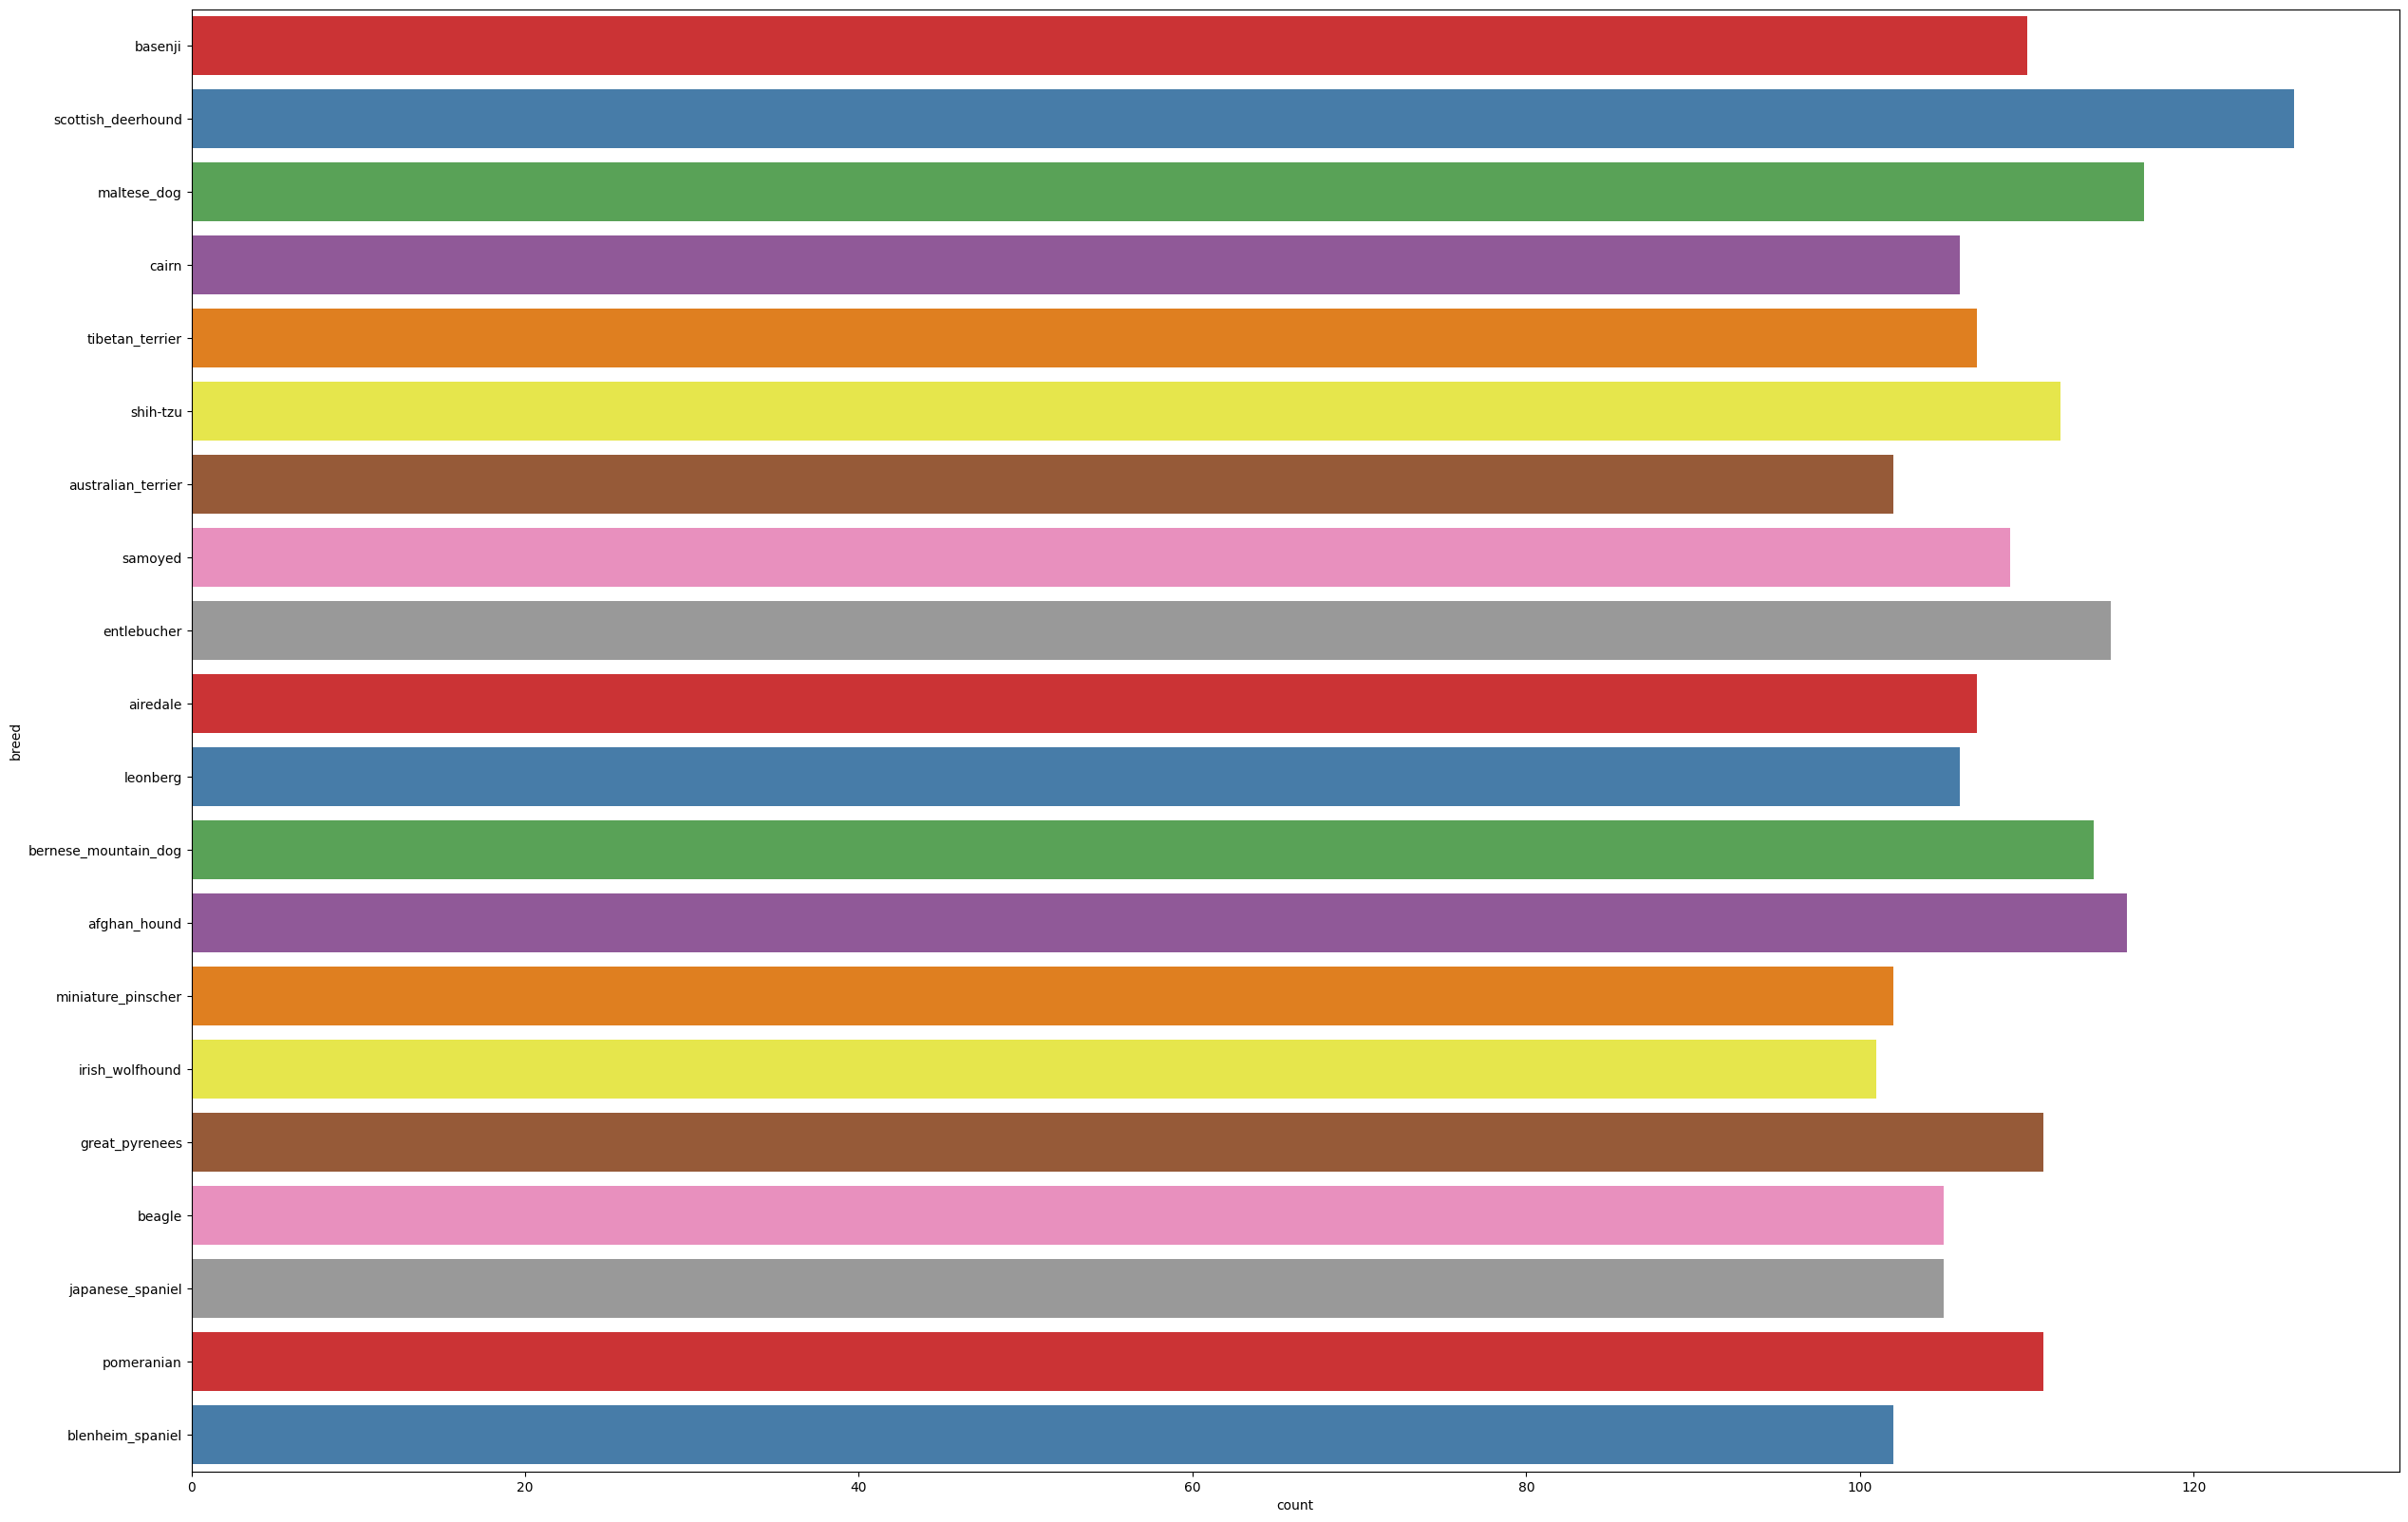

In [14]:
plt.figure(figsize=(30,20))
sns.countplot(y="breed",data=labels,palette="Set1")
plt.show()

In [15]:
def read_and_resize_image_rgb(file_path):
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    return img_rgb_resized

In [16]:
image_dir = '/content/drive/MyDrive/DogBreed/train'

In [17]:
resized_images = []
for idx, filename in enumerate(labels['id']):
    img_path = os.path.join(image_dir, filename + '.jpg')
    resized_img = read_and_resize_image_rgb(img_path)
    resized_images.append(resized_img)
resized_images_array = np.array(resized_images)

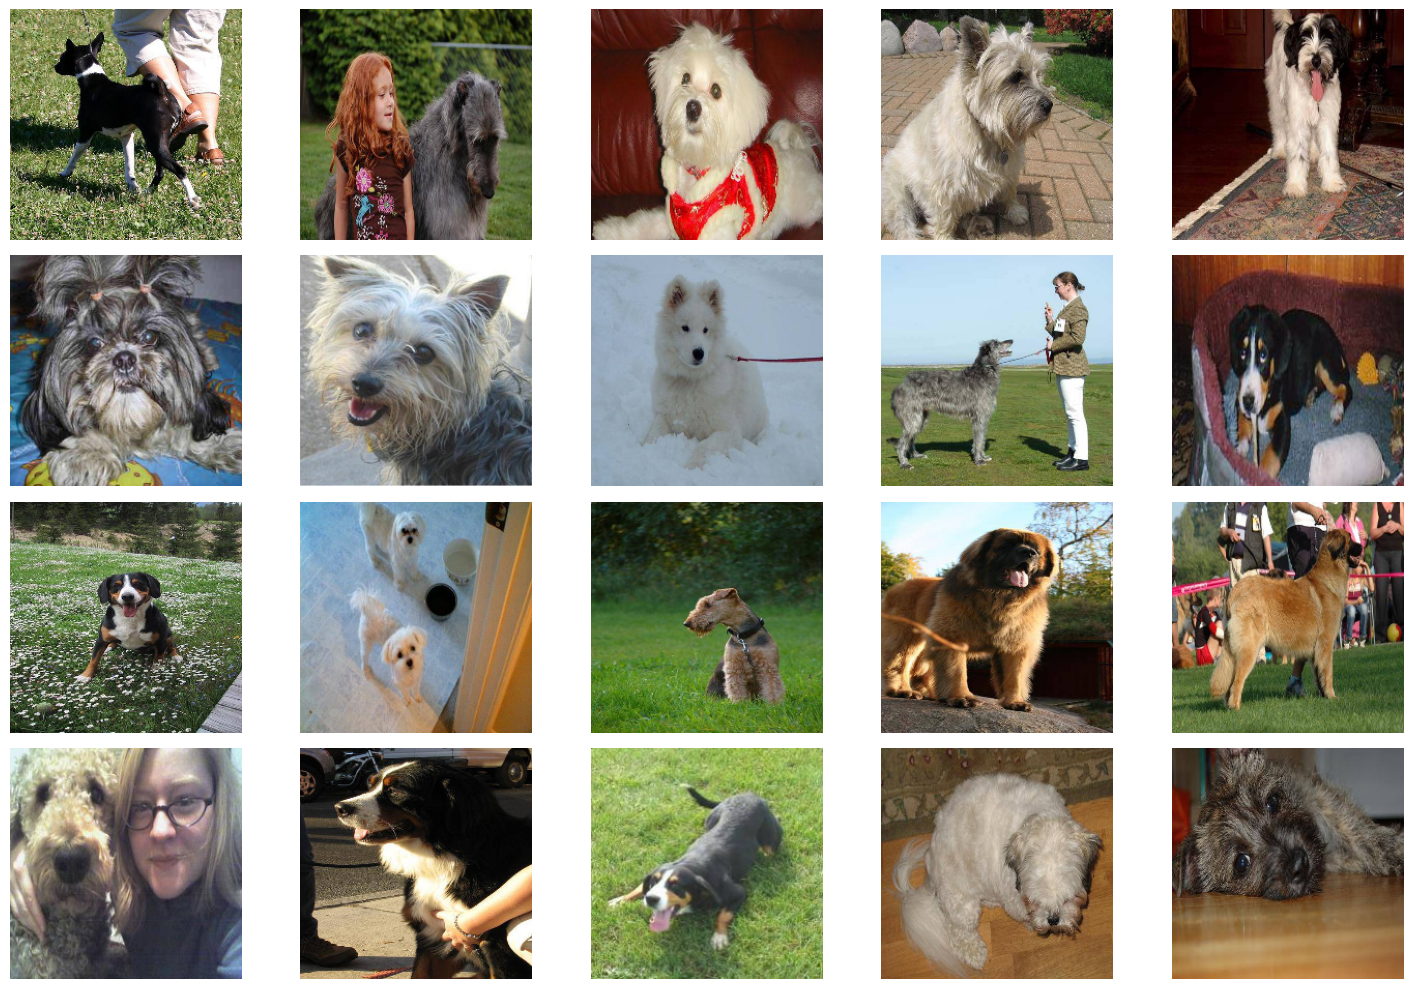

In [18]:
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(resized_images_array[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
class_names = labels['breed'].unique()
class_names[1:10]

array(['scottish_deerhound', 'maltese_dog', 'cairn', 'tibetan_terrier',
       'shih-tzu', 'australian_terrier', 'samoyed', 'entlebucher',
       'airedale'], dtype=object)

In [20]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(labels['breed'])
new_labels = to_categorical(label_encoded)

In [21]:
X = resized_images_array
y = new_labels

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1856, 224, 224, 3)
(328, 224, 224, 3)
(1856, 20)
(328, 20)


In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

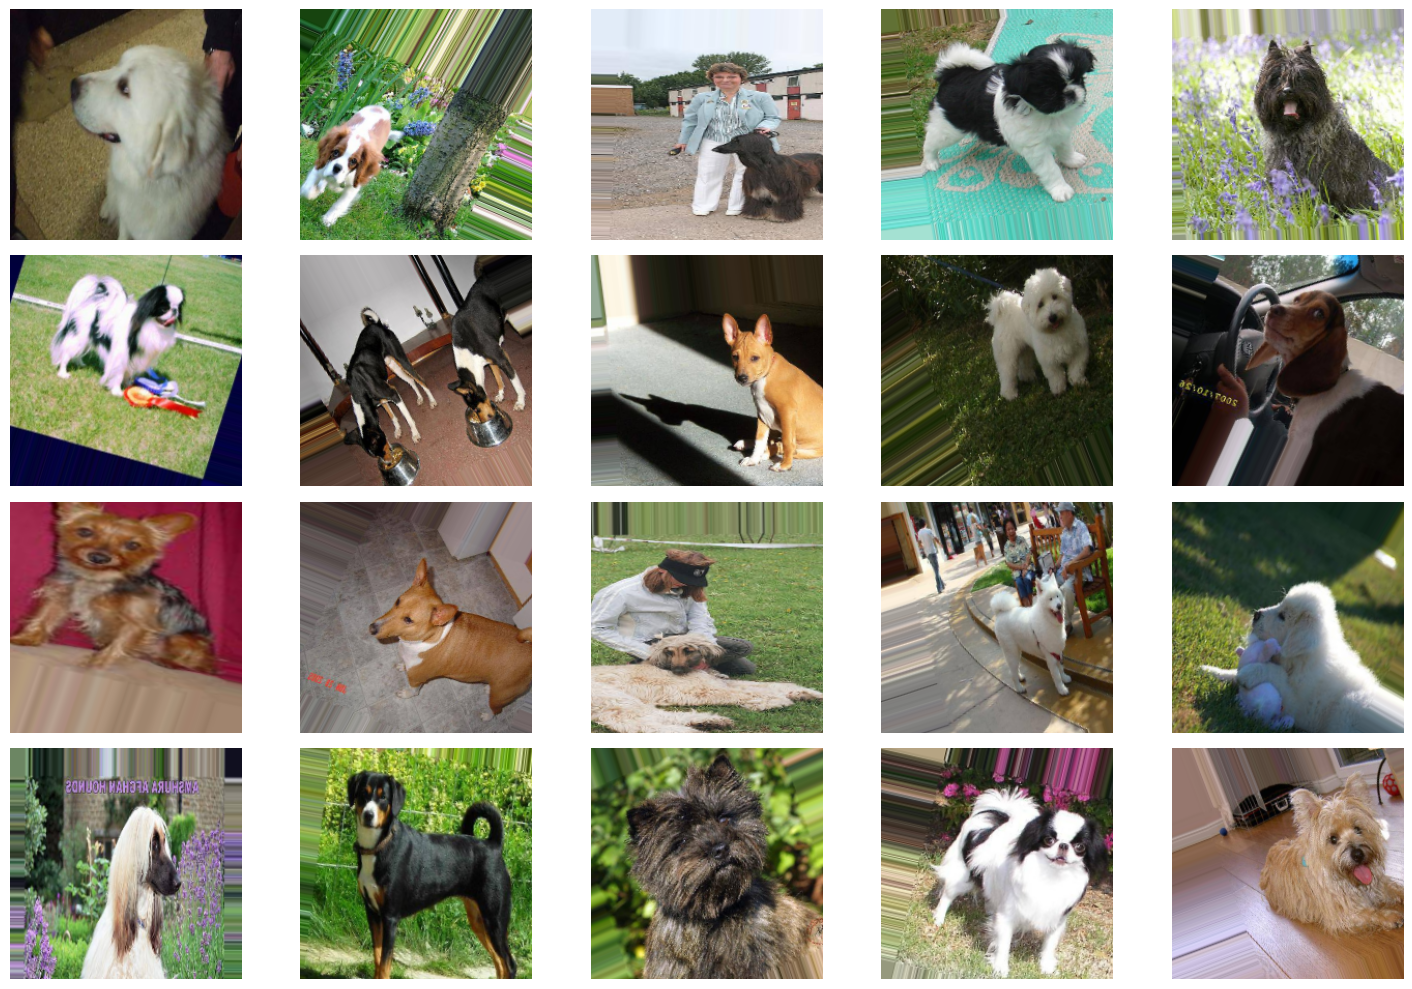

In [25]:
augmented_images = train_datagen.flow(X_train, y=y_train, shuffle=True)
plt.figure(figsize=(15, 10))
for i in range(20):
    augmented_image = augmented_images.next()[0][0]
    plt.subplot(4, 5, i + 1)
    plt.imshow(augmented_image)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
training_set=train_datagen.flow(X_train,y=y_train,batch_size=64)
testing_set=test_datagen.flow(X_test,y=y_test,batch_size=64)

In [27]:
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='sigmoid'),
    Dropout(0.2),
    Dense(20, activation='softmax')
])

In [28]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)        0

In [30]:
history=model.fit_generator(training_set,validation_data = testing_set,epochs = 10)

Epoch 1/10
29/29 [==============================] - 51s 2s/step - loss: 3.0587 - accuracy: 0.0469 - val_loss: 2.9706 - val_accuracy: 0.0762
Epoch 2/10
29/29 [==============================] - 48s 2s/step - loss: 2.9643 - accuracy: 0.0824 - val_loss: 2.9149 - val_accuracy: 0.1006
Epoch 3/10
29/29 [==============================] - 48s 2s/step - loss: 2.9060 - accuracy: 0.1024 - val_loss: 2.8488 - val_accuracy: 0.1220
Epoch 4/10
29/29 [==============================] - 56s 2s/step - loss: 2.8240 - accuracy: 0.1352 - val_loss: 2.7819 - val_accuracy: 0.1280
Epoch 5/10
29/29 [==============================] - 47s 2s/step - loss: 2.7552 - accuracy: 0.1514 - val_loss: 2.7169 - val_accuracy: 0.1555
Epoch 6/10
29/29 [==============================] - 49s 2s/step - loss: 2.7133 - accuracy: 0.1589 - val_loss: 2.6764 - val_accuracy: 0.1463
Epoch 7/10
29/29 [==============================] - 48s 2s/step - loss: 2.6683 - accuracy: 0.1767 - val_loss: 2.6467 - val_accuracy: 0.1921
Epoch 8/10
29/29 [==

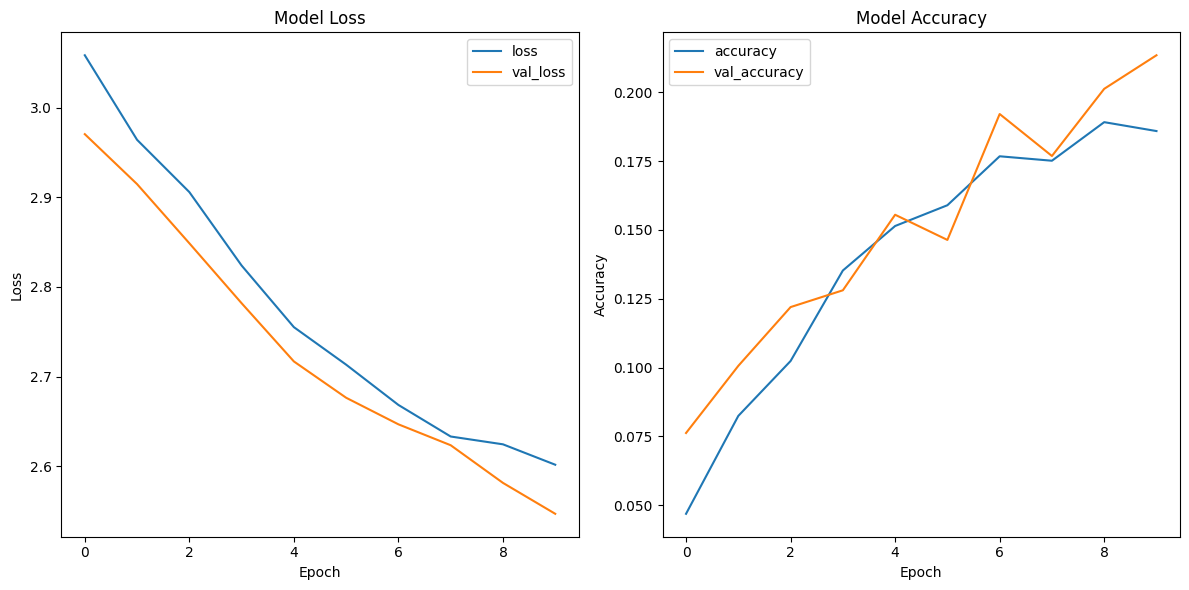

In [32]:
history_labels = pd.DataFrame(history.history)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_labels['loss'], label='loss')
plt.plot(history_labels['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_labels['accuracy'], label='accuracy')
plt.plot(history_labels['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
labels = pd.read_csv('/content/drive/MyDrive/DogBreed/labels.csv')
labels.shape

(10222, 2)

In [34]:
def read_and_resize_image_rgb(file_path):
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    return img_rgb_resized

In [35]:
resized_images = []
for idx, filename in enumerate(labels['id']):
    img_path = os.path.join(image_dir, filename + '.jpg')
    resized_img = read_and_resize_image_rgb(img_path)
    resized_images.append(resized_img)
resized_images_array = np.array(resized_images)

In [36]:
class_names = labels['breed'].unique()

resized_images shape: (10222, 224, 224, 3)
resized_images dtype: uint8
labels shape: (10222,)
labels dtype: object


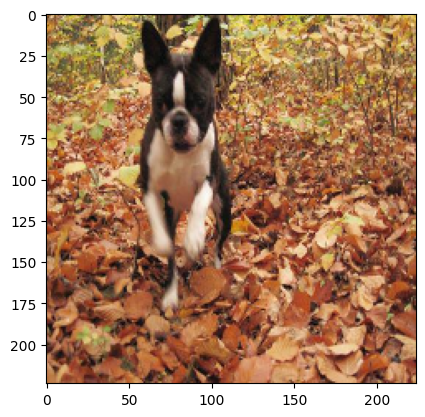

In [37]:
print("resized_images shape:", resized_images_array.shape)
print("resized_images dtype:", resized_images_array.dtype)
print("labels shape:",labels['breed'].shape)
print("labels dtype:",labels['breed'].dtype)

import matplotlib.pyplot as plt
plt.imshow(resized_images_array[0])
plt.show()

In [38]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(labels['breed'])
new_labels = to_categorical(label_encoded)

In [39]:
X = resized_images_array
y = new_labels

In [40]:
def get_features(model_name, model_preprocessor, input_size, data):
    input_layer = Input(input_size)
    preprocessor = model_preprocessor(input_layer)
    base_model = model_name(weights='imagenet', include_top=False, input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs=input_layer, outputs=avg)
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape:', feature_maps.shape)
    return feature_maps

In [41]:
effnet_preprocessor = tf.keras.applications.efficientnet.preprocess_input
effnet_features = get_features(EfficientNetB4, effnet_preprocessor, (224, 224, 3), X)

xception_preprocessor = tf.keras.applications.xception.preprocess_input
xception_features = get_features(Xception, xception_preprocessor, (224, 224, 3), X)

resnet_preprocessor = tf.keras.applications.resnet50.preprocess_input
resnet_features = get_features(ResNet50, resnet_preprocessor, (224, 224, 3), X)

320/320 [==============================] - 1252s 4s/step
Feature maps shape: (10222, 1792)
320/320 [==============================] - 1386s 4s/step
Feature maps shape: (10222, 2048)
320/320 [==============================] - 1227s 4s/step
Feature maps shape: (10222, 2048)


In [43]:
final_features = np.concatenate([effnet_features, xception_features, resnet_features], axis=-1)
print('Final feature maps shape:', final_features.shape)

Final feature maps shape: (10222, 5888)


In [44]:
model = Sequential()
model.add(Dropout(0.5, input_shape=(final_features.shape[1],)))
model.add(Dense(120, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [46]:
history = model.fit(final_features, y,
                    batch_size=128,
                    epochs=50,
                    validation_split=0.15,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
66/68 [============================>.] - ETA: 0s - loss: 1.5715 - accuracy: 0.6201
Epoch 1: val_accuracy improved from -inf to 0.84355, saving model to best_model.h5
68/68 [==============================] - 2s 19ms/step - loss: 1.5460 - accuracy: 0.6253 - val_loss: 0.5013 - val_accuracy: 0.8435
Epoch 2/50
67/68 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8708
Epoch 2: val_accuracy improved from 0.84355 to 0.87875, saving model to best_model.h5
68/68 [==============================] - 1s 16ms/step - loss: 0.4104 - accuracy: 0.8701 - val_loss: 0.4321 - val_accuracy: 0.8787
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 0.2673 - accuracy: 0.9164
Epoch 3: val_accuracy did not improve from 0.87875
68/68 [==============================] - 1s 16ms/step - loss: 0.2673 - accuracy: 0.9164 - val_loss: 0.4276 - val_accuracy: 0.8677
Epoch 4/50
65/68 [===========================>..] - ETA: 0s - loss: 0.1725 - accuracy: 0.9476
Epoch 4: val_a

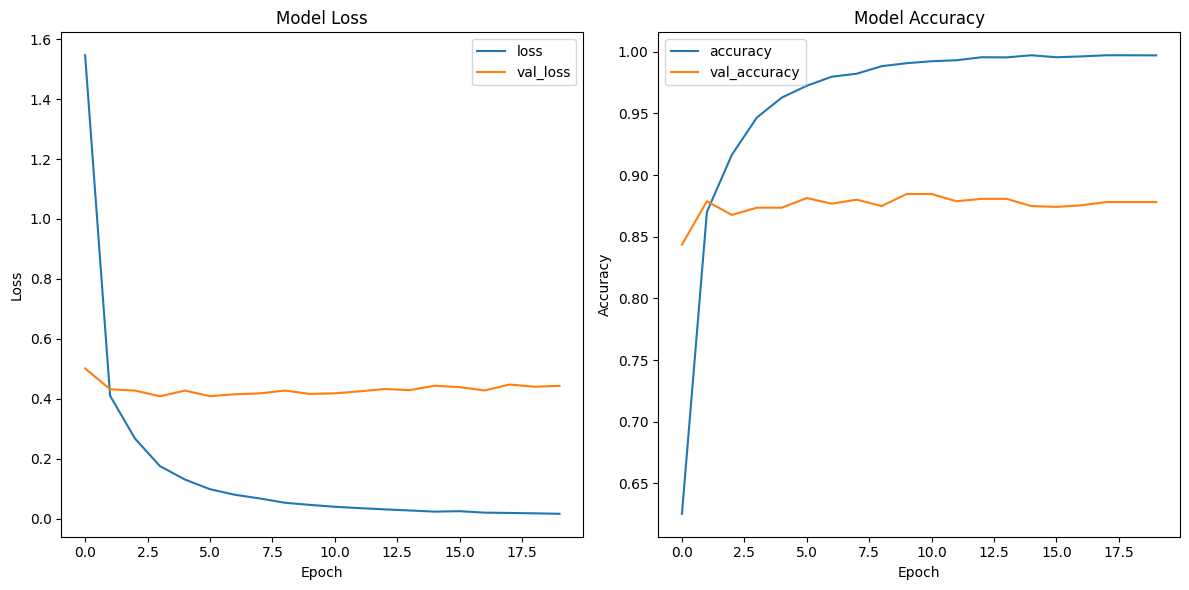

In [48]:
history_label_2 = pd.DataFrame(history.history)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_label_2['loss'], label='loss')
plt.plot(history_label_2['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_label_2['accuracy'], label='accuracy')
plt.plot(history_label_2['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
best_model = load_model('best_model.h5')

In [50]:
all_predictions = best_model.predict(final_features)
all_predicted_labels = np.argmax(all_predictions, axis=1)
true_labels = np.argmax(y, axis=1)

320/320 [==============================] - 1s 2ms/step


In [51]:
random.seed(6)
random_indices = random.sample(range(len(resized_images)), 20)

In [52]:
def plot_images(images, predicted_labels, true_labels, class_names):
    plt.figure(figsize=(15, 10))
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        pred_label = predicted_labels[i]
        true_label = true_labels[i]
        if pred_label == true_label:
            title_color = 'green'
        else:
            title_color = 'red'
        plt.title(f"Predicted: {pred_label}\nTrue: {true_label}", color=title_color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [53]:
images_random_20 = [resized_images[i] for i in random_indices]
predicted_labels_random_20 = all_predicted_labels[random_indices]
true_labels_random_20 = true_labels[random_indices]

In [54]:
predicted_labels_names = label_encoder.inverse_transform(predicted_labels_random_20)
true_labels_names = label_encoder.inverse_transform(true_labels_random_20)

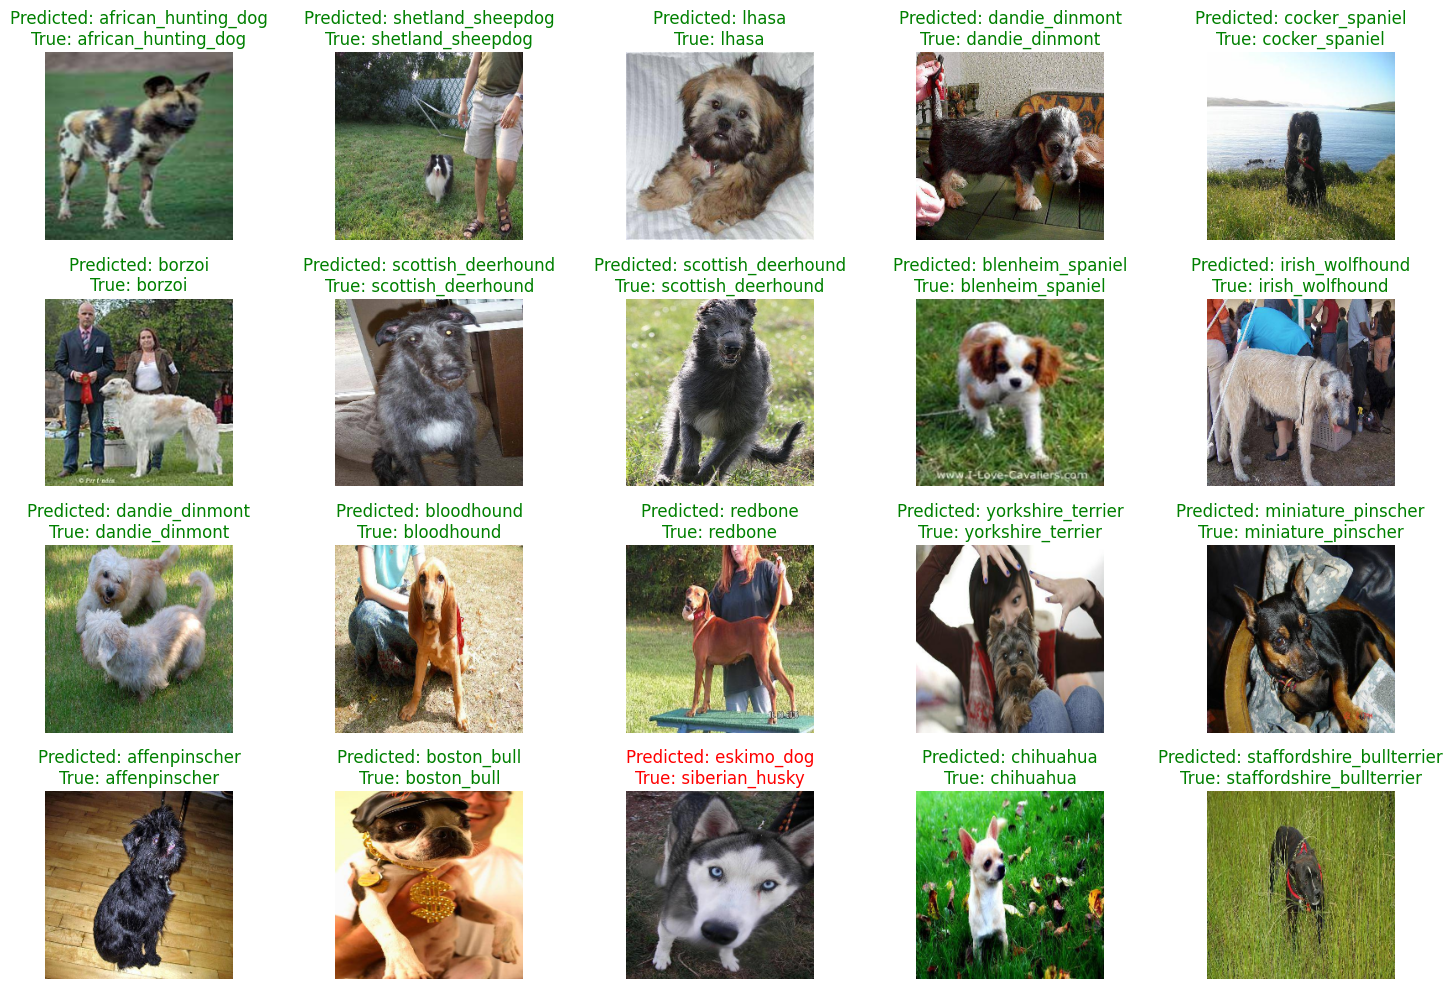

In [55]:
plot_images(images_random_20, predicted_labels_names, true_labels_names, class_names)

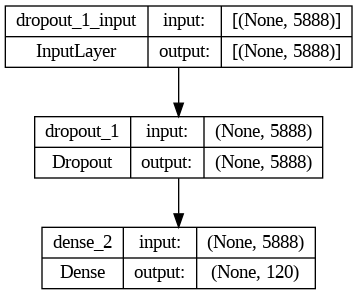

In [61]:
from keras.utils import plot_model

plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)